In [2]:
from concurrent.futures import ProcessPoolExecutor, as_completed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw
from tqdm.notebook import tqdm
import sys
import os

# Add the parent directory (where 'ants' is located) to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from ants.model import AntWorld
from ants.agent import Environment, Ant, Food, Home, Predator
from functools import reduce

### Phase transition exploration-exploitation?

In [2]:
height = 50
width = 50

random_move_probs = np.linspace(0.0, 1.0, 10)
trials_per_setting = 5

In [3]:
def run_many_simulations(prob):

    results = []
    # for prob in tqdm(random_move_probs, desc="Running simulations"):

    food_collected = []
    surviving_ants = []
    
    for _ in range(trials_per_setting):

        model = AntWorld(height=height, width=width, prob_random=prob, num_predators=0)
        model.run_model()

        food_collected.append(model.home.amount)
        surviving_ants.append(sum(1 for agent in model.schedule.agents if isinstance(agent, Ant)))
    
    avg_food_collected = np.mean(food_collected)
    sem_food_collected = np.std(food_collected) / np.sqrt(trials_per_setting)
    ci_lower_food = avg_food_collected - 1.96 * sem_food_collected
    ci_upper_food = avg_food_collected + 1.96 * sem_food_collected

    avg_surviving_ants = np.mean(surviving_ants)
    sem_surviving_ants = np.std(surviving_ants) / np.sqrt(trials_per_setting)
    ci_lower_ants = avg_surviving_ants - 1.96 * sem_surviving_ants
    ci_upper_ants = avg_surviving_ants + 1.96 * sem_surviving_ants

    results.append({
        'prob_random': prob,
        'avg_food_collected': avg_food_collected,
        'ci_lower_food': ci_lower_food,
        'ci_upper_food': ci_upper_food,
        'avg_surviving_ants': avg_surviving_ants,
        'ci_lower_ants': ci_lower_ants,
        'ci_upper_ants': ci_upper_ants
    })

    return results


In [4]:
random_move_probs = np.linspace(0.0, 1.0, 10)

with ProcessPoolExecutor(max_workers=10) as executor:
    futures = executor.map(run_many_simulations, random_move_probs)

results = list(futures)
results = reduce(lambda x, y: x + y, results)

/home/kaleem/courses/CSS/ants-mesa/ants/model.py:92: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (25, 25). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(self.home, homeloc)
/home/kaleem/courses/CSS/ants-mesa/ants/model.py:92: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (25, 25). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(self.home, homeloc)
/home/kaleem/courses/CSS/ants-mesa/ants/model.py:92: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (25, 25). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(self.home, homeloc)
/home/kaleem/courses/CSS/ants-mesa/ants/model.py:92: UserWarning: Agent 1 is be

## Plot food collected and surviving ants

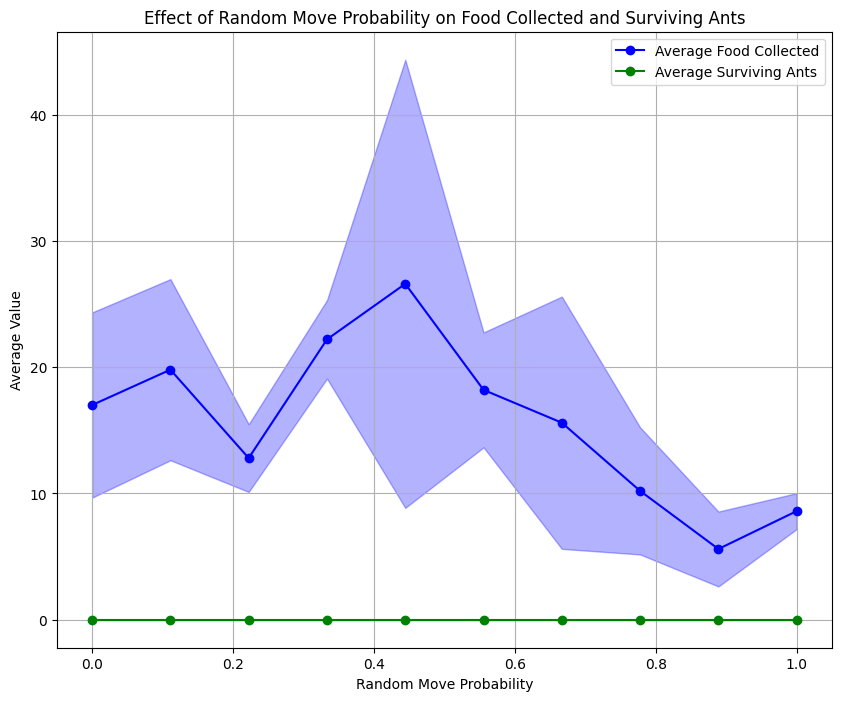

In [5]:
prob_random_values = [result['prob_random'] for result in results]
avg_food_collected_values = [result['avg_food_collected'] for result in results]
ci_lower_food_values = [result['ci_lower_food'] for result in results]
ci_upper_food_values = [result['ci_upper_food'] for result in results]

avg_surviving_ants_values = [result['avg_surviving_ants'] for result in results]
ci_lower_ants_values = [result['ci_lower_ants'] for result in results]
ci_upper_ants_values = [result['ci_upper_ants'] for result in results]

plt.figure(figsize=(10, 8))

plt.plot(prob_random_values, avg_food_collected_values, color='blue', marker='o', label='Average Food Collected')
plt.fill_between(prob_random_values, ci_lower_food_values, ci_upper_food_values, color='blue', alpha=0.3)

plt.plot(prob_random_values, avg_surviving_ants_values, color='green', marker='o', label='Average Surviving Ants')
plt.fill_between(prob_random_values, ci_lower_ants_values, ci_upper_ants_values, color='green', alpha=0.3)

plt.title('Effect of Random Move Probability on Food Collected and Surviving Ants')
plt.xlabel('Random Move Probability')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)

plt.show()

### Powerlaw distribution eaten ants

In [3]:
height = 50
width = 50
trials_per_setting = 20
num_predators = 10

In [ ]:
def run_many_ants_eaten(iteration):
    ants_eaten_by_predators = []
    model = AntWorld(height=height, width=width, num_predators=num_predators)
    model.run_model()

    for agent in model.schedule.agents:
        if isinstance(agent, Predator):
            ants_eaten_by_predators.append(agent.ants_eaten)

    return ants_eaten_by_predators


with ProcessPoolExecutor(max_workers=10) as executor:
    futures = executor.map(run_many_ants_eaten, range(trials_per_setting))

results = list(futures)
ants_eaten_by_predator = reduce(lambda x, y: x + y, results)

/home/kaleem/courses/CSS/ants-mesa/ants/model.py:92: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (25, 25). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(self.home, homeloc)
/home/kaleem/courses/CSS/ants-mesa/ants/model.py:92: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (25, 25). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(self.home, homeloc)
/home/kaleem/courses/CSS/ants-mesa/ants/model.py:92: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (25, 25). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(self.home, homeloc)
/home/kaleem/courses/CSS/ants-mesa/ants/model.py:92: UserWarning: Agent 1 is be

## Distribution of ants eaten by predator

/home/kaleem/miniconda3/envs/CSS/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


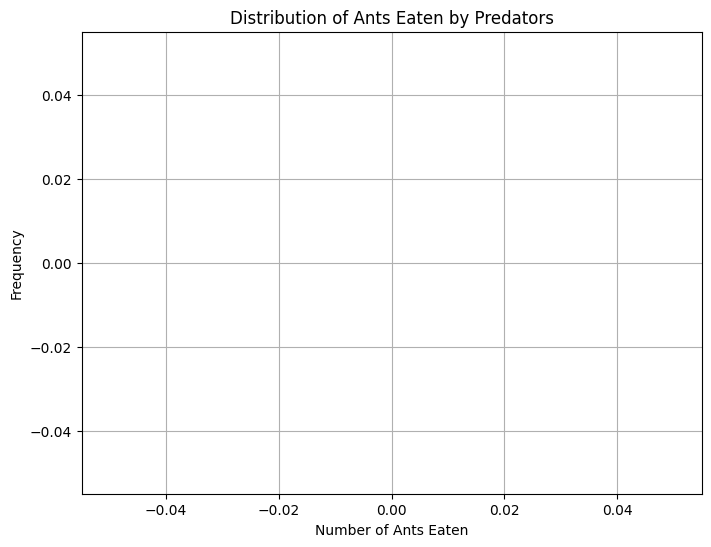

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(ants_eaten_by_predator, bins=10, density=True, alpha=0.7, color='blue')
plt.title("Distribution of Ants Eaten by Predators")
plt.xlabel("Number of Ants Eaten")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [14]:
ants_eaten_by_predators

NameError: name 'ants_eaten_by_predators' is not defined

In [ ]:
# Fit a power law
results = powerlaw.Fit(ants_eaten_by_predators)

plt.figure(figsize=(8, 6))
results.plot_pdf(color='blue', linestyle='-', label='Empirical Data')
results.power_law.plot_pdf(color='red', linestyle='--', label='Power Law Fit')
plt.title("Power Law Fit of Ants Eaten Distribution")
plt.xlabel("Number of Ants Eaten")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

### Meal sizes

In [5]:
height = 50
width = 50
num_predators = 1

In [ ]:
model = AntWorld(height=height, width=width, num_predators=num_predators)
model.run_model()

for agent in model.schedule.agents:
    if isinstance(agent, Predator):
            meal_sizes = agent.meal_sizes

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(meal_sizes, bins=10, density=True, alpha=0.7, color='blue')
plt.title("Distribution of Meal Sizes")
plt.xlabel("Number of Ants Eaten")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Fit a power law
results = powerlaw.Fit(meal_sizes)

plt.figure(figsize=(8, 6))
results.plot_pdf(color='blue', linestyle='-', label='Empirical Data')
results.power_law.plot_pdf(color='red', linestyle='--', label='Power Law Fit')
plt.title("Power Law Fit of Ants Eaten Distribution")
plt.xlabel("Number of Ants Eaten")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()